In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [12]:
import pandas as pd
print(pd.__version__)


2.3.3


In [15]:

import os
print(os.getcwd())


c:\Users\PAVAN RAYAPUREDDY\Desktop\HOUSERENT PREDICTION


In [2]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [4]:
data.shape

(4746, 12)

In [5]:
data.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
378,2022-05-10,1,5000,322,1 out of 3,Carpet Area,Dum Dum Metro,Kolkata,Unfurnished,Bachelors/Family,1,Contact Agent
4328,2022-05-16,2,13000,1250,2 out of 6,Super Area,"LB Nagar, NH 9",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
3421,2022-06-23,3,30000,1300,19 out of 19,Super Area,Navalur,Chennai,Furnished,Bachelors/Family,3,Contact Owner
3699,2022-06-10,2,8500,800,Ground out of 1,Super Area,Ambattur,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
1845,2022-07-06,2,12000,800,1 out of 1,Super Area,"Horamavu Agara, Hormavu",Bangalore,Semi-Furnished,Family,2,Contact Owner


In [6]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [11]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [18]:
data.shape

(4746, 12)

In [20]:
print(data.columns.tolist())


['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']


In [21]:
data.drop(columns=['Posted On', 'Floor', 'Area Locality'], inplace=True)


In [22]:
data.columns = data.columns.str.strip().str.lower()
print(data.columns)


Index(['bhk', 'rent', 'size', 'area type', 'city', 'furnishing status',
       'tenant preferred', 'bathroom', 'point of contact'],
      dtype='object')


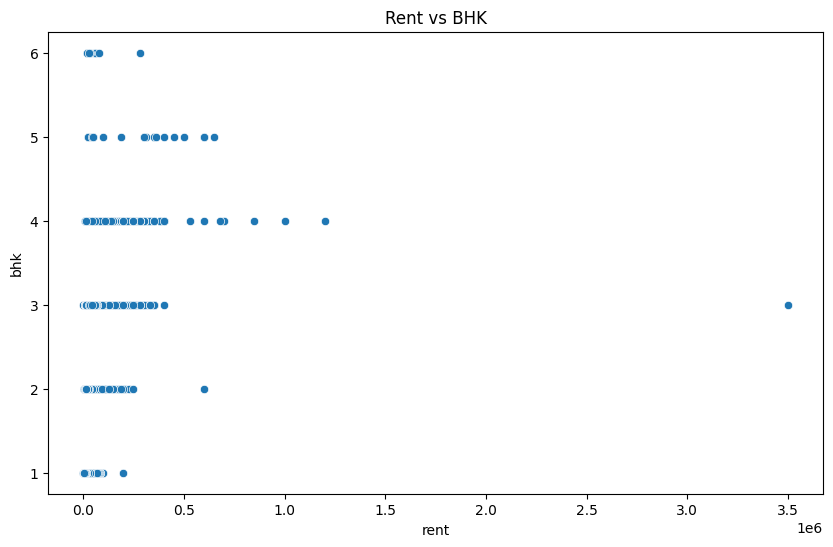

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="rent", y="bhk", data=data)
plt.title("Rent vs BHK")
plt.show()


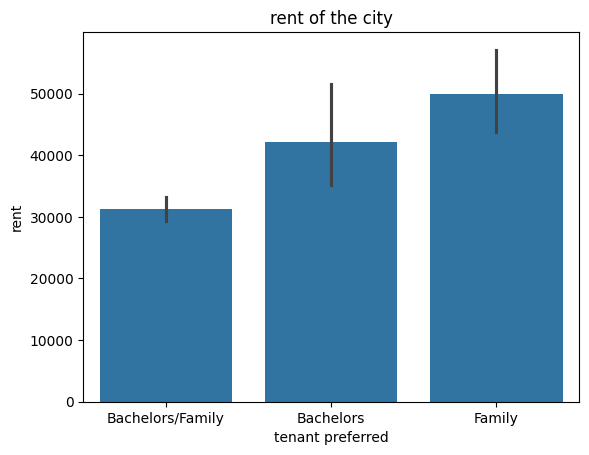

In [31]:
sns.barplot(x = "tenant preferred" , y = "rent", data = data)
plt.title("rent of the city")
plt.show()

In [33]:
categorial_cols = data.select_dtypes(include=['object']).columns
categorial_cols

Index(['area type', 'city', 'furnishing status', 'tenant preferred',
       'point of contact'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [35]:
for col in categorial_cols:
    print(f"{col}: {data[col].nunique()}")

area type: 3
city: 6
furnishing status: 3
tenant preferred: 3
point of contact: 3


In [36]:
data.columns

Index(['bhk', 'rent', 'size', 'area type', 'city', 'furnishing status',
       'tenant preferred', 'bathroom', 'point of contact'],
      dtype='object')

In [39]:
x = data.drop(columns=['rent'])
y = data['rent']

In [41]:
print(x.head())
print(y.head())


   bhk  size    area type     city furnishing status  tenant preferred  \
0    2  1100   Super Area  Kolkata       Unfurnished  Bachelors/Family   
1    2   800   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
2    2  1000   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
3    2   800   Super Area  Kolkata       Unfurnished  Bachelors/Family   
4    2   850  Carpet Area  Kolkata       Unfurnished         Bachelors   

   bathroom point of contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner  
0    10000
1    20000
2    17000
3    10000
4     7500
Name: rent, dtype: int64


In [42]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: rent, dtype: int64

In [43]:
x.head()

,bhk,size,area type,city,furnishing status,tenant preferred,bathroom,point of contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [48]:
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(return_df=True)
x_encoded = encoder.fit_transform(x, y)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale
scalar = MinMaxScaler()
x = scalar.fit_transform(x)

In [60]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
x_train.shape , y_test.shape

((3796, 8), (950,))

In [3]:
x_test.shape , y_test.shape

NameError: name 'x_test' is not defined

In [ ]:
#training model is and evalution of linear regression , random forest , decision tree

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [1]:
model_rfr = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
models = [model_rfr, model_dt, model_lr]


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
#Fitting data in all three models
for model in models:
    print(f"training{models}")
    model.fit(x_train,y_train)

In [ ]:
for model in models:
    print(f"score of {model} is : {model.score(X_test, y_test)}:")

In [ ]:
new_data =  pd.DataFrame({
    'BHK' : [7],
    'Size' : [3600],
    'Area Type' : ['SUPER AREA'],
    'City' : ['Bangalore'],
    'furnishing Status' : ['furnished'],
    'Bathroom' : [6]

}
)
new_data_encoder = encoder.transform(new_data)
new_data_scaled = scalar.transform(new_data_encoder)
predicted_rent = model_rfr.predict(new_data_scaled)
print(f"The predicted rent for the new data is: {predicted_rent[0]:.2f}")
